#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   Rodrigo Rodriguez Rodriguez A01183284
*   Christian Emilio Saldana Lopez A00506509
*   Irvin Gomez Esquivel A00361034
*   Erick Najera Olivero A01793506

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [21]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier 
from sklearn.inspection import permutation_importance

# modelos
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from sklearn import tree
import pydotplus
from IPython.display import Image
import graphviz
from sklearn.model_selection import RepeatedKFold

In [22]:
path="dataset_Facebook.csv"
df= pd.read_csv(path,sep=";")

#**Ejercicio-1.** 

In [23]:
df.rename(columns={'Lifetime People who have liked your Page and engaged with your post':"LPE"}, inplace=True)
df.head()


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [24]:
X = df.iloc[:,:7]
y = df.LPE
print(X.shape)
print(y.shape)

(500, 7)
(500,)


#**Ejercicio-2.**

In [25]:
X_prueba, X_eval, y_prueba, y_eval = train_test_split(X,y, train_size = .2)
print(X_prueba.shape)

(100, 7)


In [26]:
X.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid'],
      dtype='object')

#**Ejercicio-3.**

In [27]:
# Incluye aquí las líneas de código que definan a la función: mi_RMSE:
def mi_RMSE(actual, predicted):  
  return np.mean((actual-predicted)**2) ** (1/2)

# Incluye aquí las líneas de código que definan a la función: mi_MAE:
def mi_MAE(actual, predicted):
  return np.mean(np.abs(actual - predicted))  

# Incluye aquí las líneas de código que definan a la función: mi_MAPE:
def mi_MAPE(actual, predicted):
  return np.mean(np.abs((actual - predicted) / actual)) * 100

#**Ejercicio-4.**

# Descripcion de las variables
- Category es variable categorica.
- Page total likes es cuantiativo.
- Type es categorico.
- Post month es dato ordinal.
- Post hour es dato ordinal.
- Post weekday es dato ordinal.
- Paid es dato binario.

In [28]:
# Transformaciones a factores numéricos de entrada:Quantitativas
#Identificamos las columnas (amount, duration, age)
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))]) 
num_pipeline_nombres = ['Page total likes'] 
#Identificamos las variables categorias y binarias y aplicamos transformación OneHotE
catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first',handle_unknown='ignore'))])
catOHE_pipeline_nombres = ['Type', 'Category', 'Paid']

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
cT= ColumnTransformer(transformers = [
    ('numpipe', num_pipeline, num_pipeline_nombres),('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],remainder='passthrough')

#**Ejercicio-5.**

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_eval , y_eval, train_size=0.75)
modeloDummy = DummyClassifier(strategy='uniform')

modeloDummy.fit(X_train, y_train)
yhat = modeloDummy.predict(X_val)
yhat2= modeloDummy.predict(X_train)

In [30]:
print(yhat)
print(yhat2)

[1564  760  327  493  985  187  475 1716  407  998    9  428  398  420
  740  100  291  697  469  469 1568 1716  646 2806  453  416  642 2119
  167  742  347 2126  569  677  487  760  677  346   77  132  557  348
  774  351  101  157 3798  275  100  737 2099  355  398  327  487  240
   15  476  493  175  167  183  465  462  420  557  384 2806  407  407
 2252  740 2119 1568  278  246 2602  268  191  402 1905  590  328  453
  462  537 1395  211  143  657  167  975  384  269  606 3798 4376  465
  422 2126]
[ 280  314 1609  246  401  559  646 1975  173  347  137  536  240  843
  683  367  537  465 1292  222  476  126 4376  506  355  470  885  487
 2126  297  408  423  516  760 1162  843  392  583  546  477  221  342
  593  348  843  814  865  642   92  708  516   93  183  636 1292  185
  420   93  389 1233  167  217   92 1609  221  217  175 2602  403  247
 2806  230  240 1661  489  173   17  283  280  293  361  283  722  335
 2099  269  489  516  376  475  230  222  132  266 2099  194  253

In [31]:



valor_RMSE = mi_RMSE(y_val,yhat)
valor_MAE = mi_MAE(y_val,yhat)
valor_MAPE = mi_MAPE(y_val,yhat)

valor_RMSE_train = mi_RMSE(y_train,yhat2)
valor_MAE_train = mi_MAE(y_train,yhat2)
valor_MAPE_train = mi_MAPE(y_train,yhat2)

print("Evaluation")

print("RRMSE",valor_RMSE)
print("MAE",valor_MAE)
print("MAPE",valor_MAPE)
print("Training")
print("RMSE",valor_RMSE)
print("MAE",valor_MAE)
print("MAPE",valor_MAPE)


Evaluation
RRMSE 1053.9858253316313
MAE 654.96
MAPE 182.1711294344772
Training
RMSE 1053.9858253316313
MAE 654.96
MAPE 182.1711294344772


#**Ejercicio-6.**

In [32]:
def get_model():
  modelado, nombres = list(), list()
  # LR - Regresión lineal multiple:
  modelado.append(LinearRegression())
  nombres.append('LR')
  #Bosque Aleatorio
  modelado.append(RandomForestClassifier())
  nombres.append('RW')
  # perceptrón multicapa
  modelado.append(MLPRegressor(max_iter=5000,learning_rate_init=0.1))
  nombres.append('MLP')
  return modelado, nombres
  modelos, nombres = get_model()
  print(modelos)
  print(nombres)

In [34]:
modelos, nombres = get_model()
resultados=list()
for i in range(len(modelos)):  # para realizar entrenamiento en forma conjunta
    pipeline = Pipeline(steps=[('CT',cT),('M',modelos[i])])
    Kfold = RepeatedKFold(n_splits=3, n_repeats=6,random_state=11)

# se crea el diccionario con las metricas a utilizar
    Scores = {'mi_rmse':make_scorer(mi_RMSE), 'mi_mae':make_scorer(mi_MAE), 'mi_mape':make_scorer(mi_MAPE)}

# Se realiza la validacion cruzada
    scoresSin = cross_validate(pipeline,
                          X_train, np.ravel(y_train),
                          scoring=Scores,
                          cv=Kfold,
                          return_train_score=True)
    resultados.append(scoresSin)

    print("Para los datos de test")
    print('%s:\nmean mi_RMSE: %.3f (%.4f)\n mean mi_mae: %.3f (%.4f)\n mi_mape: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scoresSin['test_mi_rmse']),
                                                                          np.std(scoresSin['test_mi_rmse']),
                                                                          np.mean(scoresSin['test_mi_mae']),
                                                                          np.std(scoresSin['test_mi_mae']),
                                                                          np.mean(scoresSin['test_mi_mape']),
                                                                          np.std(scoresSin['test_mi_mape'])
                                                                          ))
    print("Para los datos de train")
    print('%s:\nmean mi_RMSE: %.3f (%.4f)\nmean mi_mae: %.3f (%.4f)\nmean mi_mape: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scoresSin['train_mi_rmse']),
                                                                          np.std(scoresSin['train_mi_rmse']),
                                                                          np.mean(scoresSin['train_mi_mae']),
                                                                          np.std(scoresSin['train_mi_mae']),
                                                                          np.mean(scoresSin['train_mi_mape']),
                                                                          np.std(scoresSin['train_mi_mape'])
                                                                          ),"\n\n")

Para los datos de test
LR:
mean mi_RMSE: 541.225 (66.2951)
 mean mi_mae: 312.828 (23.8806)
 mi_mape: 125.096 (39.3387)

Para los datos de train
LR:
mean mi_RMSE: 504.489 (31.0532)
mean mi_mae: 292.553 (15.7089)
mean mi_mape: 117.074 (20.7887)
 


Para los datos de test
RW:
mean mi_RMSE: 765.416 (102.4890)
 mean mi_mae: 421.452 (59.8134)
 mi_mape: 122.392 (41.7599)

Para los datos de train
RW:
mean mi_RMSE: 9.756 (7.5270)
mean mi_mae: 0.739 (0.6080)
mean mi_mape: 0.252 (0.2730)
 


Para los datos de test
MLP:
mean mi_RMSE: 649.490 (131.8053)
 mean mi_mae: 378.862 (51.1634)
 mi_mape: 141.902 (48.9622)

Para los datos de train
MLP:
mean mi_RMSE: 424.583 (66.2538)
mean mi_mae: 255.904 (34.6148)
mean mi_mape: 101.213 (19.9508)
 




#**Ejercicio-7.**

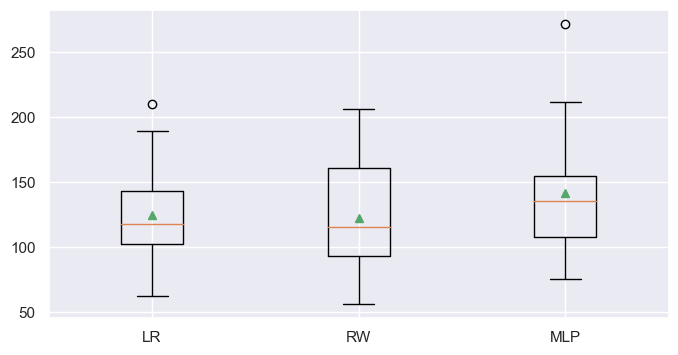

In [35]:
#Diagrama de cajas y bigotes para los 3 modelos con la metrica Recall
sns.set(rc={'figure.figsize':(8,4)})
bpGmean = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_mi_mape']
  bpGmean.append(rr)

plt.boxplot(bpGmean, labels=nombres, showmeans=True)
plt.show()

#**Ejercicio-8.**

In [36]:
#Función do_grid_search para realizar la busqueda de los mejores hiperparametros para cada uno de los modelos
def do_grid_search(model, X, y, cv, dicc_grid, scoring = 'accuracy'):
    
    grid_pipe = Pipeline(steps = [
        ('Correlation', cT),
        ('model', model)
        ])

    #Creamos el grid
    grid = GridSearchCV(
        estimator= grid_pipe, cv=cv,
        param_grid=dicc_grid, scoring=scoring, n_jobs=-1)

    
    grid.fit(X, y.values.ravel())

    #Imprimimos resultados
    print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
    print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
    print('Métrica utilizada:', grid.scoring)

    return grid

In [37]:
#Diccionario con diferente valores de hiperparametros para el modelo RL
#dicc_grid = {"model__hidden_layer_sizes":np.linspace(1, 100, 10) ,"model__alpha": [0.001, 0.0001, 0.00001], "model__learning_rate_init":np.linspace(0.0001, 100, 1)}
dicc_grid = {"model__hidden_layer_sizes":np.linspace(1, 50, 10,dtype=int),
             "model__alpha": [0.00001, 0.1,20], "model__learning_rate_init": np.linspace(0.00001, 1, 10)}

grid_MLP = do_grid_search(modelos[2], X_train, y_train, Kfold, dicc_grid, make_scorer(mi_MAPE))

Mejor valor de exactitud obtenido con la mejor combinación: 185.9525548300083
Mejor combinación de valores encontrados de los hiperparámetros: {'model__alpha': 1e-05, 'model__hidden_layer_sizes': 6, 'model__learning_rate_init': 0.11112}
Métrica utilizada: make_scorer(mi_MAPE)


#**Ejercicio-9.**

In [38]:
modelo_MLP = MLPRegressor(hidden_layer_sizes=(6),
                            max_iter=5000,
                            alpha=0.000001,
                            learning_rate_init=0.11112)
XtrainFit = cT.fit(X_train)

XtrainTransf = XtrainFit.transform(X_train)

modelo_MLP.fit(XtrainTransf, y_train)

importance = permutation_importance(modelo_MLP, XtrainTransf, y_train, n_repeats=10)

Feature: 0, Score: 0.01114
Feature: 1, Score: 0.01431
Feature: 2, Score: 0.47959
Feature: 3, Score: 0.01071
Feature: 4, Score: 0.03341
Feature: 5, Score: 0.01161
Feature: 6, Score: 0.02949
Feature: 7, Score: 0.05340
Feature: 8, Score: 0.00267
Feature: 9, Score: 0.00215


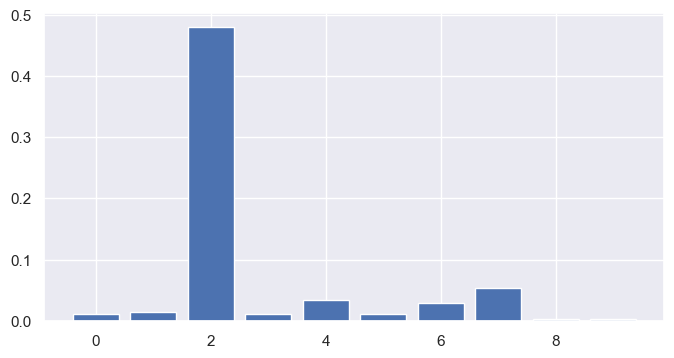

In [39]:
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:



# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-10.**

In [40]:
dicc_grid = {'model__ccp_alpha':[0],
             'model__criterion':['gini', 'entropy'],
             'model__max_depth':[None,1,2,3,4,5,10,11,12],
             'model__n_estimators': np.linspace(100, 500, 5,dtype=int),
             'model__class_weight':['balanced','balanced_subsample',None]}

grid_BA = do_grid_search(modelos[1], X_train, y_train, Kfold, dicc_grid, make_scorer(mi_MAPE))

Mejor valor de exactitud obtenido con la mejor combinación: 231.3610158208739
Mejor combinación de valores encontrados de los hiperparámetros: {'model__ccp_alpha': 0, 'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 1, 'model__n_estimators': 200}
Métrica utilizada: make_scorer(mi_MAPE)


## el soplit optimo es 2 siempre

In [41]:
modelo_MLP = RandomForestClassifier(ccp_alpha=0,class_weight="balanced",criterion="entropy",max_depth=1,min_samples_split=2,n_estimators=100,n_jobs=-1)
XtrainFit = cT.fit(X_train)

XtrainTransf = XtrainFit.transform(X_train)

modelo_MLP.fit(XtrainTransf, y_train)

importance = permutation_importance(modelo_MLP, XtrainTransf, y_train, n_repeats=10)

Feature: 0, Score: 0.02333
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.02300
Feature: 5, Score: 0.01200
Feature: 6, Score: 0.00867
Feature: 7, Score: 0.04433
Feature: 8, Score: 0.04767
Feature: 9, Score: 0.04467


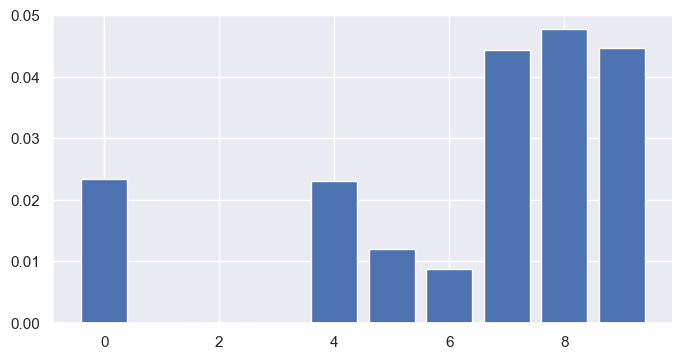

In [42]:
for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-11.**

In [43]:
dicc_grid = {'model__fit_intercept':[True,False],
             'model__normalize':[True,False],
             'model__copy_X':[True,False],
             'model__positive':[True,False]
             }

grid_LR = do_grid_search(modelos[0], X_train, y_train, Kfold, dicc_grid, make_scorer(mi_MAPE))

Mejor valor de exactitud obtenido con la mejor combinación: 127.53256283334602
Mejor combinación de valores encontrados de los hiperparámetros: {'model__copy_X': True, 'model__fit_intercept': True, 'model__normalize': True, 'model__positive': True}
Métrica utilizada: make_scorer(mi_MAPE)


C:\Users\oviwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [44]:
modelo_MLP = LinearRegression(copy_X=True,fit_intercept=True,positive=True)
XtrainFit = cT.fit(X_train)

XtrainTransf = XtrainFit.transform(X_train)

modelo_MLP.fit(XtrainTransf, y_train)

importance = permutation_importance(modelo_MLP, XtrainTransf, y_train, n_repeats=10)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.07098
Feature: 2, Score: 0.96614
Feature: 3, Score: 0.01995
Feature: 4, Score: 0.00004
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00578
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00157


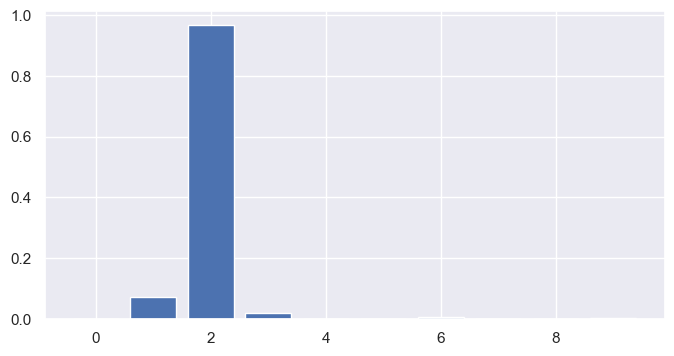

In [45]:
for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**